In [ ]:
import pandas as pd
df=pd.read_csv('dataSET.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error

In [ ]:
df=pd.read_csv('dataSET.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


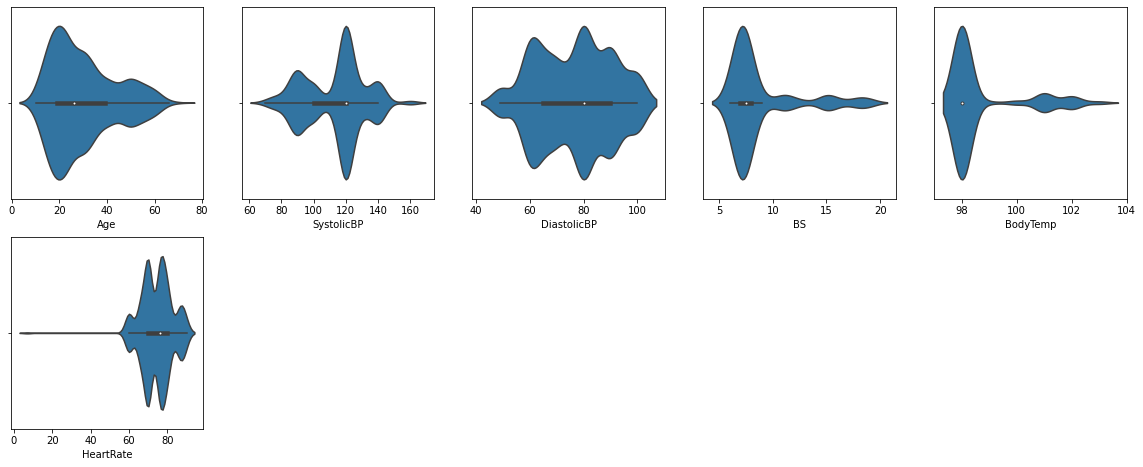

In [ ]:
cols = [i for i in df.columns]
cols = [i for i in cols if i not in ['RiskLevel']]
plt.figure(figsize=(20,12))
for i in enumerate(cols): 
    num = i[0]+1
    plt.subplot(3,5,num)
    sns.violinplot(data=df, x=i[1])
plt.show()

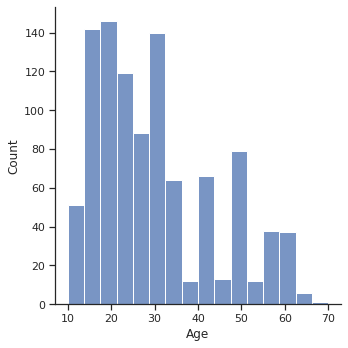

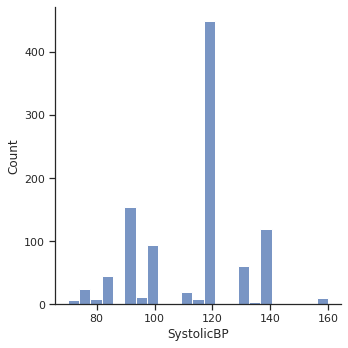

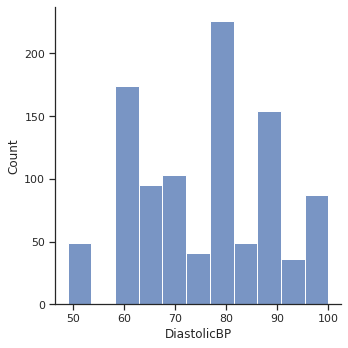

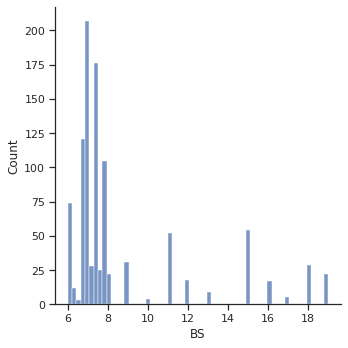

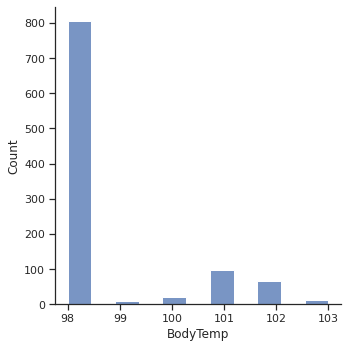

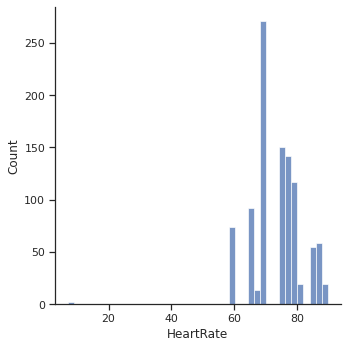

In [ ]:
for column in df.columns[:6]:  # Loop over all columns except 'Location'
    sns.set()
    sns.set(style="ticks")
    sns.displot(df[column])
    plt.show()

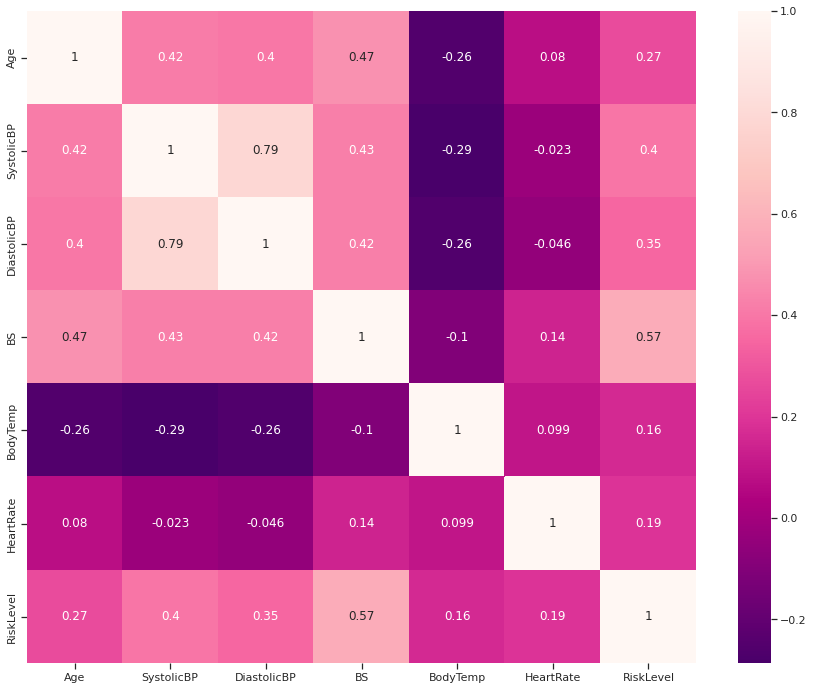

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

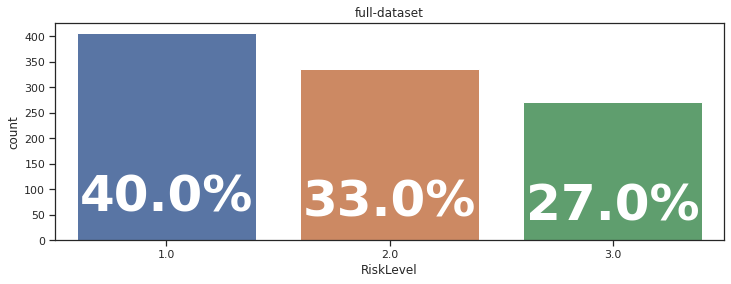

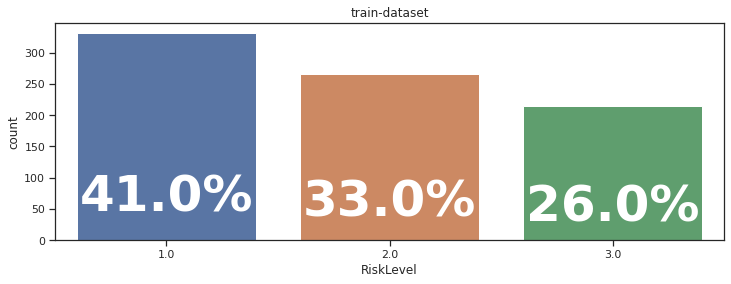

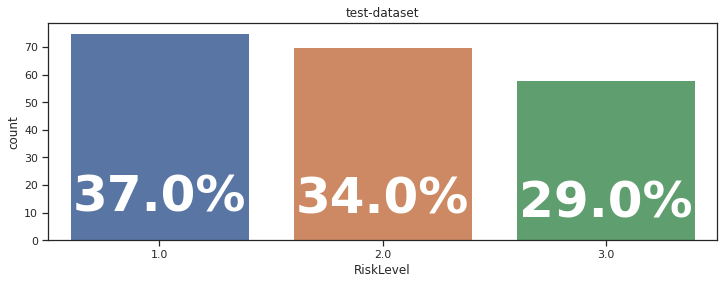

In [ ]:
def visualize_ds(df: pd.DataFrame, title: str) -> None:

    plt.figure(figsize=(12, 4))
    ax = sns.countplot(data=df, x='RiskLevel')
    ax.set_title(title)

    for i in ax.patches:

        ax.text(
            x=i.get_x() + i.get_width() / 2,
            y=i.get_y() + i.get_height() / 7,
            s=f"{np.round(i.get_height() / len(df)* 100.)}%",
            ha="center",
            size=50,
            weight="bold",
            color="white"
        )
        
train_df, test_df = train_test_split(df, test_size=0.2)

visualize_ds(df, "full-dataset")
visualize_ds(train_df, "train-dataset")
visualize_ds(test_df, "test-dataset")

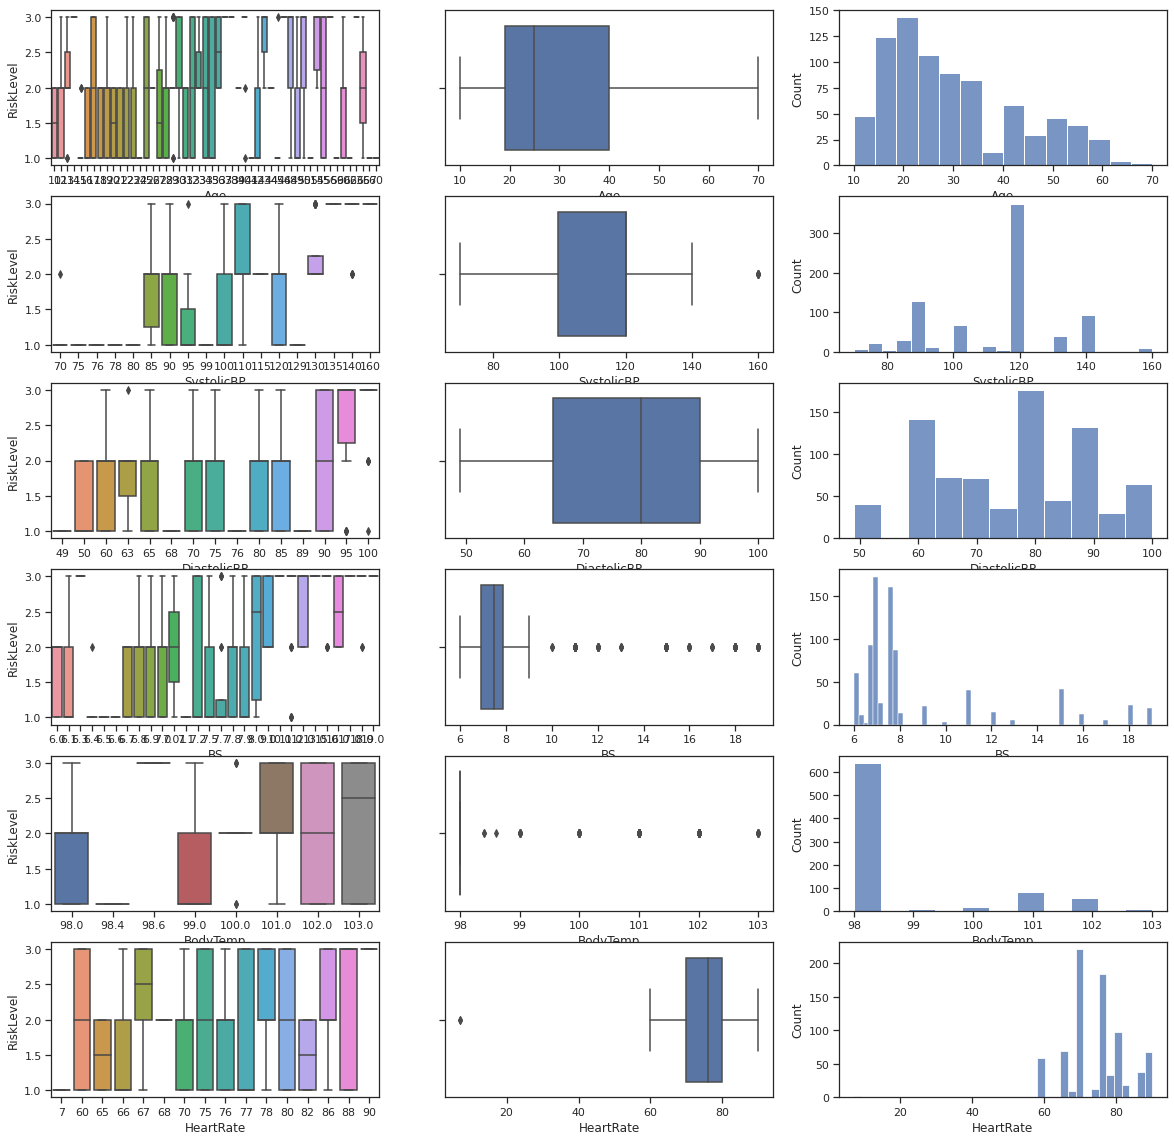

In [ ]:
numerical_features = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]

_, ax = plt.subplots(nrows=6, ncols=3, figsize=(20,20))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=train_df, x=feature, y='RiskLevel', ax=ax[i, 0])
    sns.boxplot(data=train_df, x=feature, ax=ax[i, 1])
    sns.histplot(data=train_df, x=feature, ax=ax[i, 2])

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 811
No. of testing examples: 203


In [ ]:
y_test=test['RiskLevel']
x_test=test.drop('RiskLevel', axis=1)
x_test.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
805,19,120,80,7.0,98.0,70
298,23,90,60,7.7,98.0,76
243,32,120,65,6.0,101.0,76
262,40,160,100,19.0,98.0,77
61,15,80,60,7.0,98.0,80


In [ ]:
#Setting training data into x_train and y_train
x_train=train.drop('RiskLevel',axis=1)
y_train=train['RiskLevel']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape

((811, 6), (811,), (203, 6))

In [ ]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(x_test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Risk':random_predict,'Actual Risk':y_test})
print(random_result)


0.8954243955501503
      Id  Predicted Risk  Actual Risk
805  805        1.834737          2.0
298  298        1.000000          1.0
243  243        2.000000          2.0
262  262        3.000000          3.0
61    61        1.160000          1.0
..   ...             ...          ...
550  550        2.850880          2.0
578  578        2.401502          3.0
698  698        1.133333          1.0
231  231        3.000000          3.0
505  505        1.000000          1.0

[203 rows x 3 columns]


In [ ]:
import plotly.graph_objs as go
import numpy as np
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=14),
    height=7),
    cells=dict(values=[['<b>Random Forest<b>' ],
                          [np.round(random_model.score(x_train,y_train).mean(),4), 
                                  
                                    ]]))
                     ])
fig.update_layout(width=500, height=300)
fig.update_layout(title='Model Results')
fig.show()

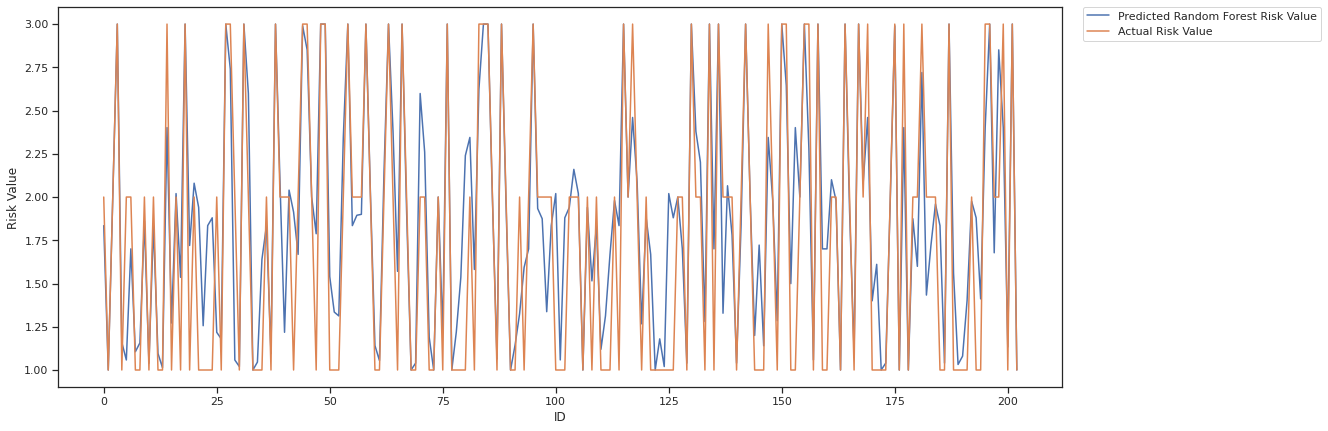

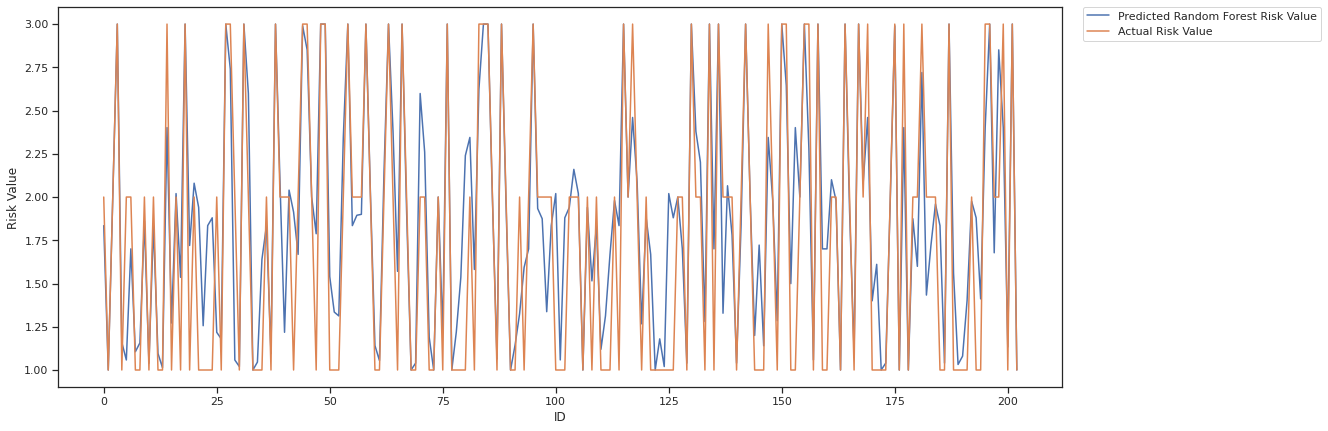

In [ ]:
plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='red',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


In [ ]:

from sklearn.datasets import make_classification
import numpy as np
     

X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [ ]:

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
from sklearn.model_selection import train_test_split
     

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
     


In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [ ]:

nb = GaussianNB()
nb.fit(X_train, Y_train)
     

GaussianNB()

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [ ]:

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
     

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:

r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [ ]:

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.872
Naive Bayes: AUROC = 0.993


In [ ]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
     

In [ ]:
import matplotlib.pyplot as plt

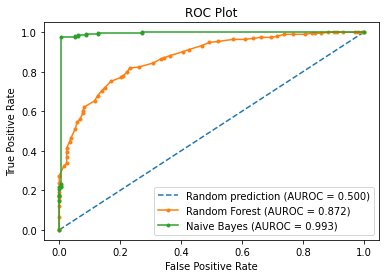

In [ ]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
     